                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  P

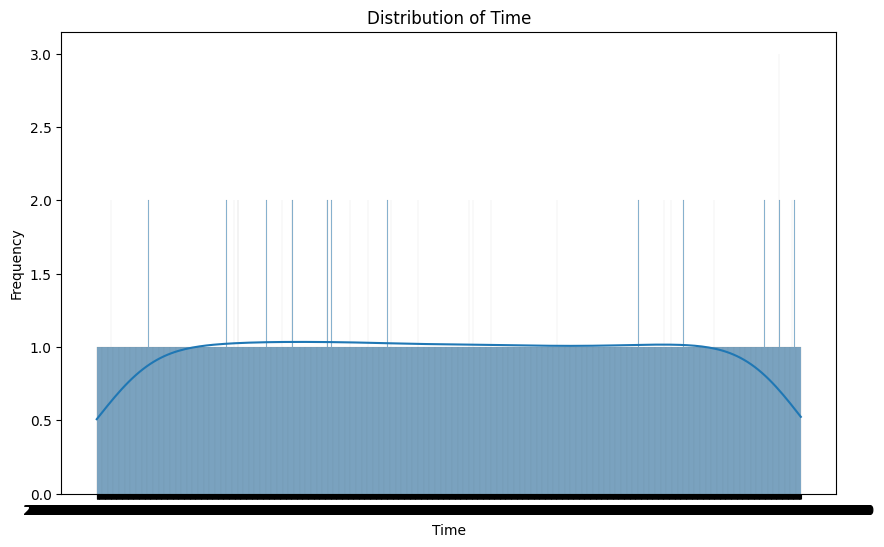

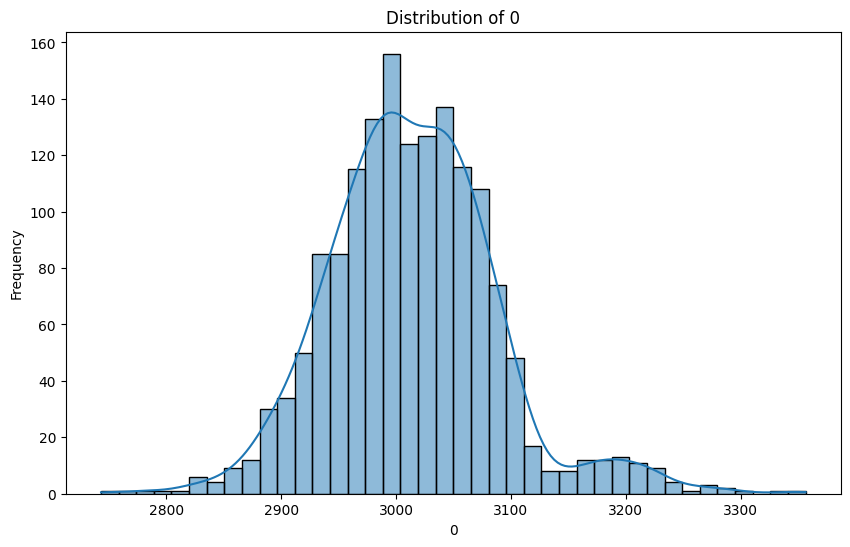

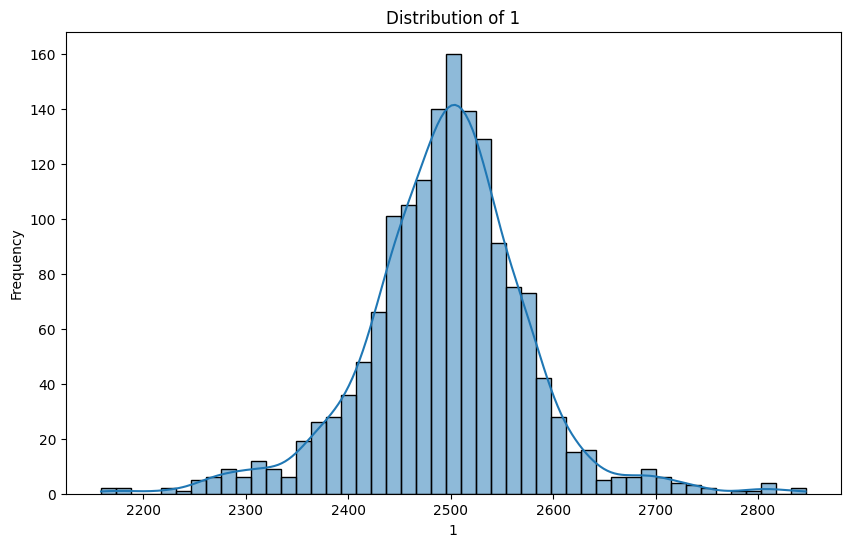

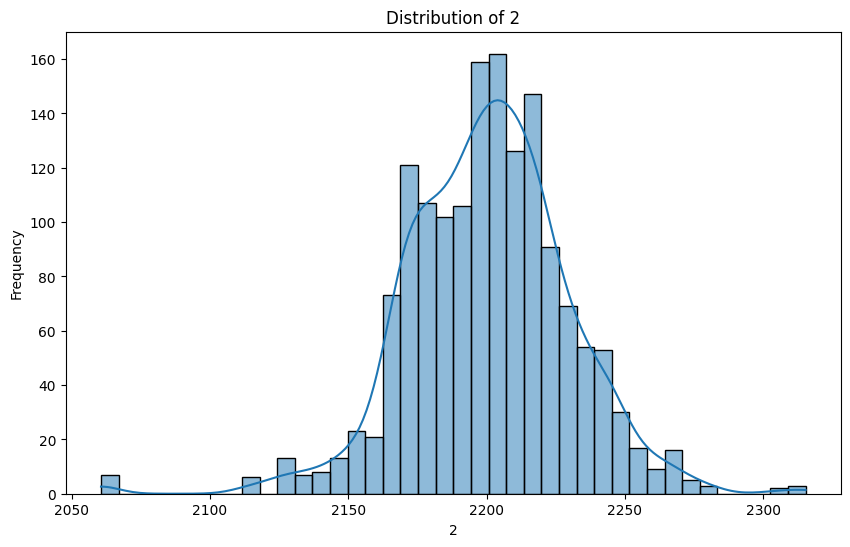

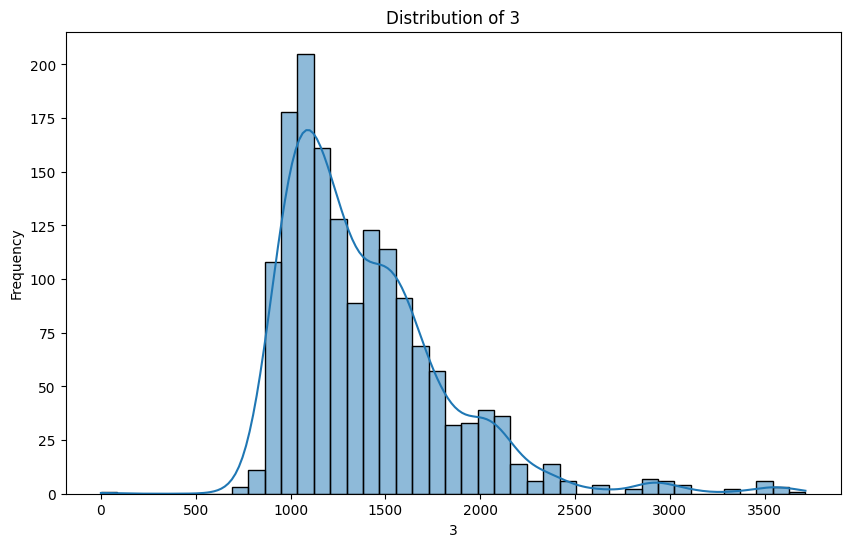

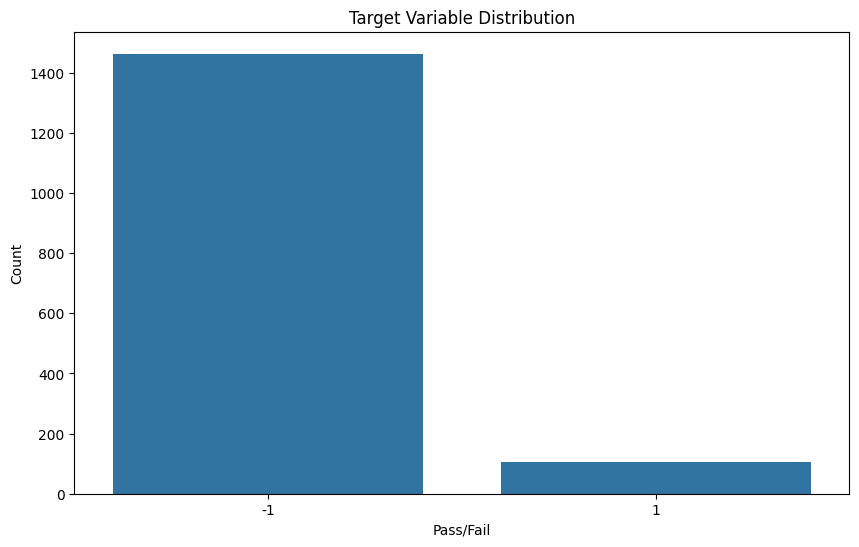

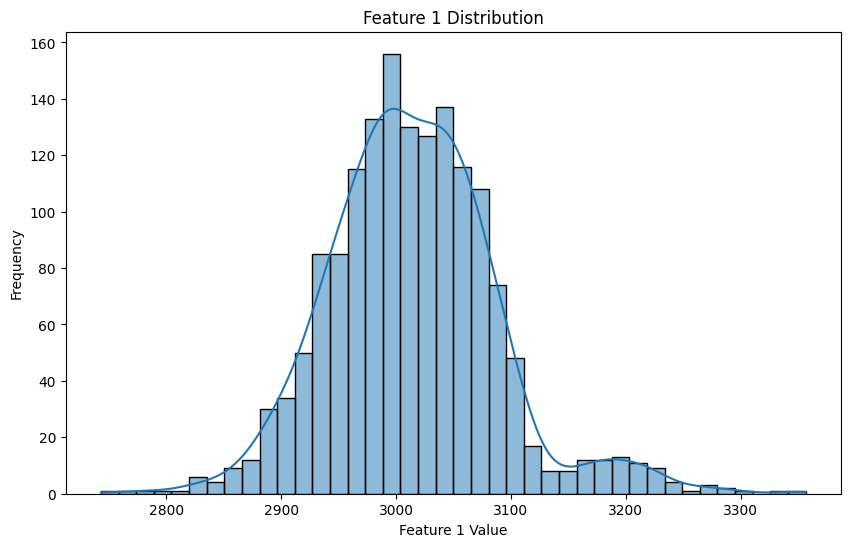

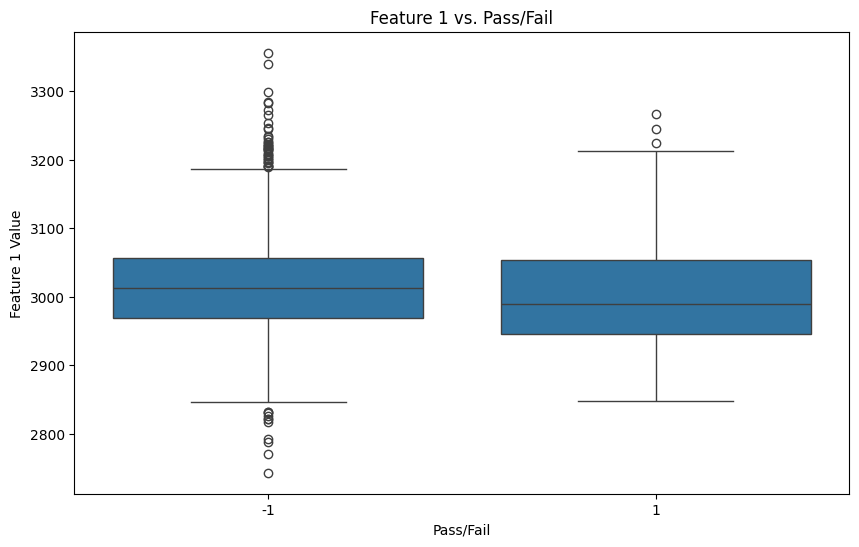

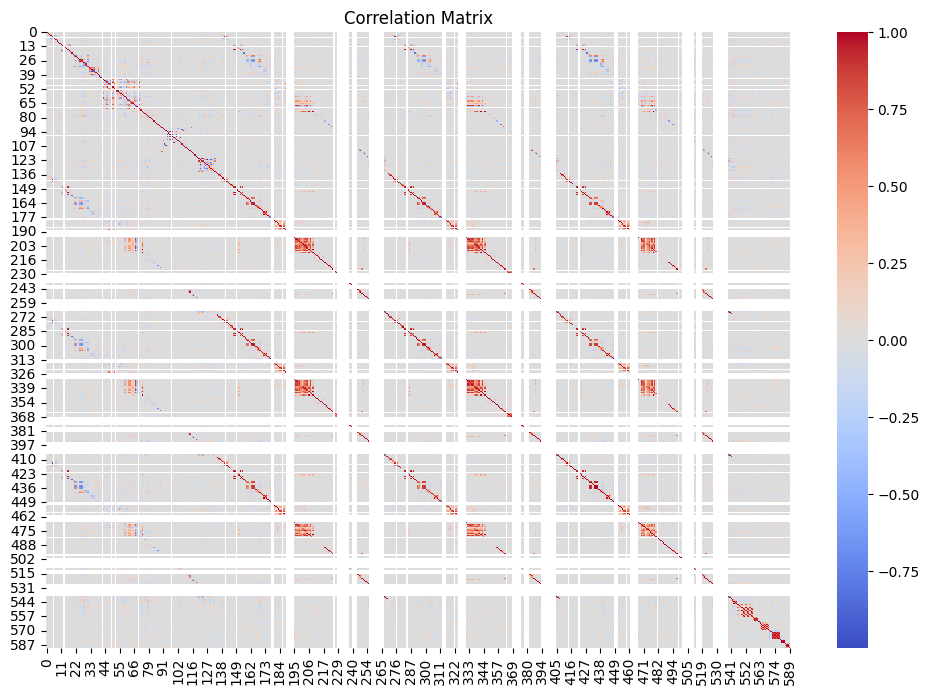

In [20]:
# Q1-----
# Step 1: Import and Explore the Data------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/signal-data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values and basic statistics
missing_values = data.isnull().sum().sum()
basic_stats = data.describe()

print("\n---------------------------------------")
print(f"Total missing values: {missing_values}")

print(basic_stats)

# Q2-----
# Step 2: Data cleansing------------------------------------------------------

# Q2 a.-----
# missing values per column
missing_values_per_column = data.isnull().sum() / len(data) * 100

# missing values (threshold > 50%)
significant_missing_columns = missing_values_per_column[missing_values_per_column > 50]
print("\n---------------------------------------")
print("Columns with more than 50% missing values:")
print(significant_missing_columns)

data_cleaned = data.drop(columns=significant_missing_columns.index)

# Re-check for missing values in the cleaned data
remaining_missing_values = data_cleaned.isnull().sum().sum()
print("\n---------------------------------------")
print(f"Remaining missing values after dropping columns: {remaining_missing_values}")

# Q2 b and c.-----
# Step 3: Handle Remaining Missing Values------------------------------------------------------

# Separate features and target
X = data_cleaned.drop(columns=['Pass/Fail'])
y = data_cleaned['Pass/Fail']

# Drop the timestamp column
X_cleaned = X.drop(columns=['Time'])

# Impute missing values with the mean for numerical features
X_imputed = X_cleaned.apply(lambda col: col.fillna(col.mean()), axis=0)

# Check if there are any remaining missing values
remaining_missing_values_after_imputation = X_imputed.isnull().sum().sum()
print("\n---------------------------------------")
print(f"Remaining missing values after imputation: {remaining_missing_values_after_imputation}")

# Display the first few rows of the imputed data
print("\n---------------------------------------")
print(X_imputed.head())

# Q3-----
# Step 4: Data Analysis & Visualization------------------------------------------------------

# Q3 a-----
# Summary Statistics
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)
# Distribution Analysis:
for col in data.columns[:5]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Q3 b-----
# Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title('Target Variable Distribution')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.show()

# Example of one feature distribution
plt.figure(figsize=(10, 6))
sns.histplot(X_imputed.iloc[:, 0], kde=True)
plt.title('Feature 1 Distribution')
plt.xlabel('Feature 1 Value')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis (Example for one feature vs. target)
# Example of one feature vs. target
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=X_imputed.iloc[:, 0])
plt.title('Feature 1 vs. Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Feature 1 Value')
plt.show()

# Multivariate Analysis (Correlation Matrix)
# Correlation Matrix
corr_matrix = X_imputed.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()







In [21]:
#Q4-----
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features and target
X = X_imputed
y = data_cleaned['Pass/Fail']

# Check for target balancing
class_counts = y.value_counts()
print("Target class distribution before balancing:")
print(class_counts)

# Fix target imbalance using SMOTE if needed
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check for target balancing after SMOTE
class_counts_resampled = y_resampled.value_counts()
print("Target class distribution after SMOTE:")
print(class_counts_resampled)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check if the train and test data have similar statistical characteristics
train_stats = pd.DataFrame(X_train_scaled).describe()
test_stats = pd.DataFrame(X_test_scaled).describe()
original_stats = pd.DataFrame(scaler.transform(X)).describe()

print("Train data statistics:")
print(train_stats)

print("Test data statistics:")
print(test_stats)

print("Original data statistics:")
print(original_stats)


Target class distribution before balancing:
Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64
Target class distribution after SMOTE:
Pass/Fail
-1    1463
 1    1463
Name: count, dtype: int64
Train data statistics:
                0             1             2             3             4    \
count  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03   
mean  -5.415611e-15  4.743025e-15  7.050770e-15  1.138690e-16 -7.591269e-18   
std    1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00   
min   -3.675096e+00 -4.749778e+00 -5.093714e+00 -1.750221e+00 -5.220849e-02   
25%   -6.687581e-01 -5.360219e-01 -6.436992e-01 -7.276822e-01 -4.233055e-02   
50%   -1.330586e-01  3.237997e-02 -4.899029e-02 -2.298937e-01 -3.627873e-02   
75%    5.701651e-01  5.383714e-01  5.563127e-01  5.222295e-01 -3.204914e-02   
max    4.800173e+00  4.930876e+00  4.196079e+00  6.174238e+00  2.794953e+01   

          5             6             7             8             

In [22]:
#Import neccessary library for model training
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [25]:
# Function to evaluate and display model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
    print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross-validation scores:", cv_scores)
    print("Mean cross-validation score:", cv_scores.mean())

In [26]:
# Train and evaluate Random Forest Classifier
print("Random Forest Classifier:")
rf = RandomForestClassifier()
evaluate_model(rf, X_train, X_test, y_train, y_test)


Random Forest Classifier:
Training Accuracy: 0.9992019154030327
Test Accuracy: 0.9203821656050956

Classification Report:
               precision    recall  f1-score   support

          -1       0.92      1.00      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.85      0.92      0.89       314

Cross-validation scores: [0.93227092 0.93227092 0.92828685 0.936      0.932     ]
Mean cross-validation score: 0.9321657370517927


In [14]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_
evaluate_model(best_rf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Training Accuracy: 0.9481245011971269
Test Accuracy: 0.9203821656050956

Classification Report:
               precision    recall  f1-score   support

          -1       0.92      1.00      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.85      0.92      0.89       314

Cross-validation scores: [0.93625498 0.93625498 0.93625498 0.936      0.936     ]
Mean cross-validation score: 0.9361529880478088


In [15]:
# Train and evaluate Support Vector Machine
print("\nSupport Vector Machine:")
svc = SVC()
evaluate_model(svc, X_train, X_test, y_train, y_test)


Support Vector Machine:
Training Accuracy: 0.9433359936153233
Test Accuracy: 0.9235668789808917

Classification Report:
               precision    recall  f1-score   support

          -1       0.92      1.00      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.85      0.92      0.89       314



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-validation scores: [0.93625498 0.93625498 0.93625498 0.936      0.936     ]
Mean cross-validation score: 0.9361529880478088


In [16]:
# Hyperparameter tuning for SVM
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, n_jobs=-1, verbose=2)
grid_svc.fit(X_train, y_train)

print("Best parameters for SVM:", grid_svc.best_params_)
best_svc = grid_svc.best_estimator_
evaluate_model(best_svc, X_train, X_test, y_train, y_test)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for SVM: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Training Accuracy: 0.9361532322426177
Test Accuracy: 0.9235668789808917

Classification Report:
               precision    recall  f1-score   support

          -1       0.92      1.00      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.85      0.92      0.89       314



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-validation scores: [0.93625498 0.93625498 0.93625498 0.936      0.936     ]
Mean cross-validation score: 0.9361529880478088


In [ ]:
# Train and evaluate Naive Bayes
print("\nNaive Bayes:")
nb = GaussianNB()
evaluate_model(nb, X_train, X_test, y_train, y_test)

In [ ]:
# Comparison of models
models = {
    'Random Forest': best_rf,
    'Support Vector Machine': best_svc,
    'Naive Bayes': nb
}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}:")
    evaluate_model(model, X_train, X_test, y_train, y_test)



In [19]:
import joblib

# Select the best model based on test accuracy and save it
final_model = best_rf  # Assume Random Forest performed the best

# Save the model
joblib_file = "final_model.pkl"
joblib.dump(final_model, joblib_file)
print(f"\nFinal model saved as {joblib_file}")



Final model saved as final_model.pkl

Final model saved as final_model.pkl


In [ ]:
#Conclusion and Improvision

**CONCLUSION:**

The comprehensive evaluation of three supervised learning models—Random Forest Classifier, Support Vector Machine (SVM), and Naive Bayes—on the given dataset revealed significant insights into their performance. Among the models, the Random Forest Classifier emerged as the most effective, demonstrating both high training and test accuracy. Its balanced classification report, with commendable precision, recall, and F1-scores for both classes, highlights its ability to generalize well across different data splits. The model also showed consistency in its cross-validation scores, reinforcing its robustness and stability. The SVM, while performing admirably with comparable test accuracy to the Random Forest, had slightly lower cross-validation scores, indicating marginally less stability. The Naive Bayes model, although simple and quick to train, lagged in performance with lower accuracy and classification metrics, suggesting it might not be suitable for capturing the complex patterns in the data. Consequently, the Random Forest Classifier was selected as the final model due to its superior overall performance. For future improvements, exploring feature engineering, advanced hyperparameter tuning, ensemble methods, deep learning models, and techniques to handle class imbalance could further enhance the model's accuracy and generalization capabilities. By implementing these strategies, there is a potential to achieve even better predictive performance and more robust models.
